# Figure B1
Examples of the parametrisation in action

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [2]:
INP_concentrations = pd.read_csv('/home/users/erinraif/acao_data/inp_data/INP_concentrations.csv', index_col='temp_bin')

In [3]:
nS_data = pd.read_csv('/home/users/erinraif/acao_data/inp_data/INP_normalised_by_aerosol.csv', index_col='temp_bin')

In [4]:
def four_param_fit(T, ln_N0, T_max, a, b):
    return ln_N0 + a*(T_max-T)**b

In [5]:
param = pd.read_csv('/home/users/erinraif/acao_data/metadata/parametrisations_final.csv', index_col='unique_ID')

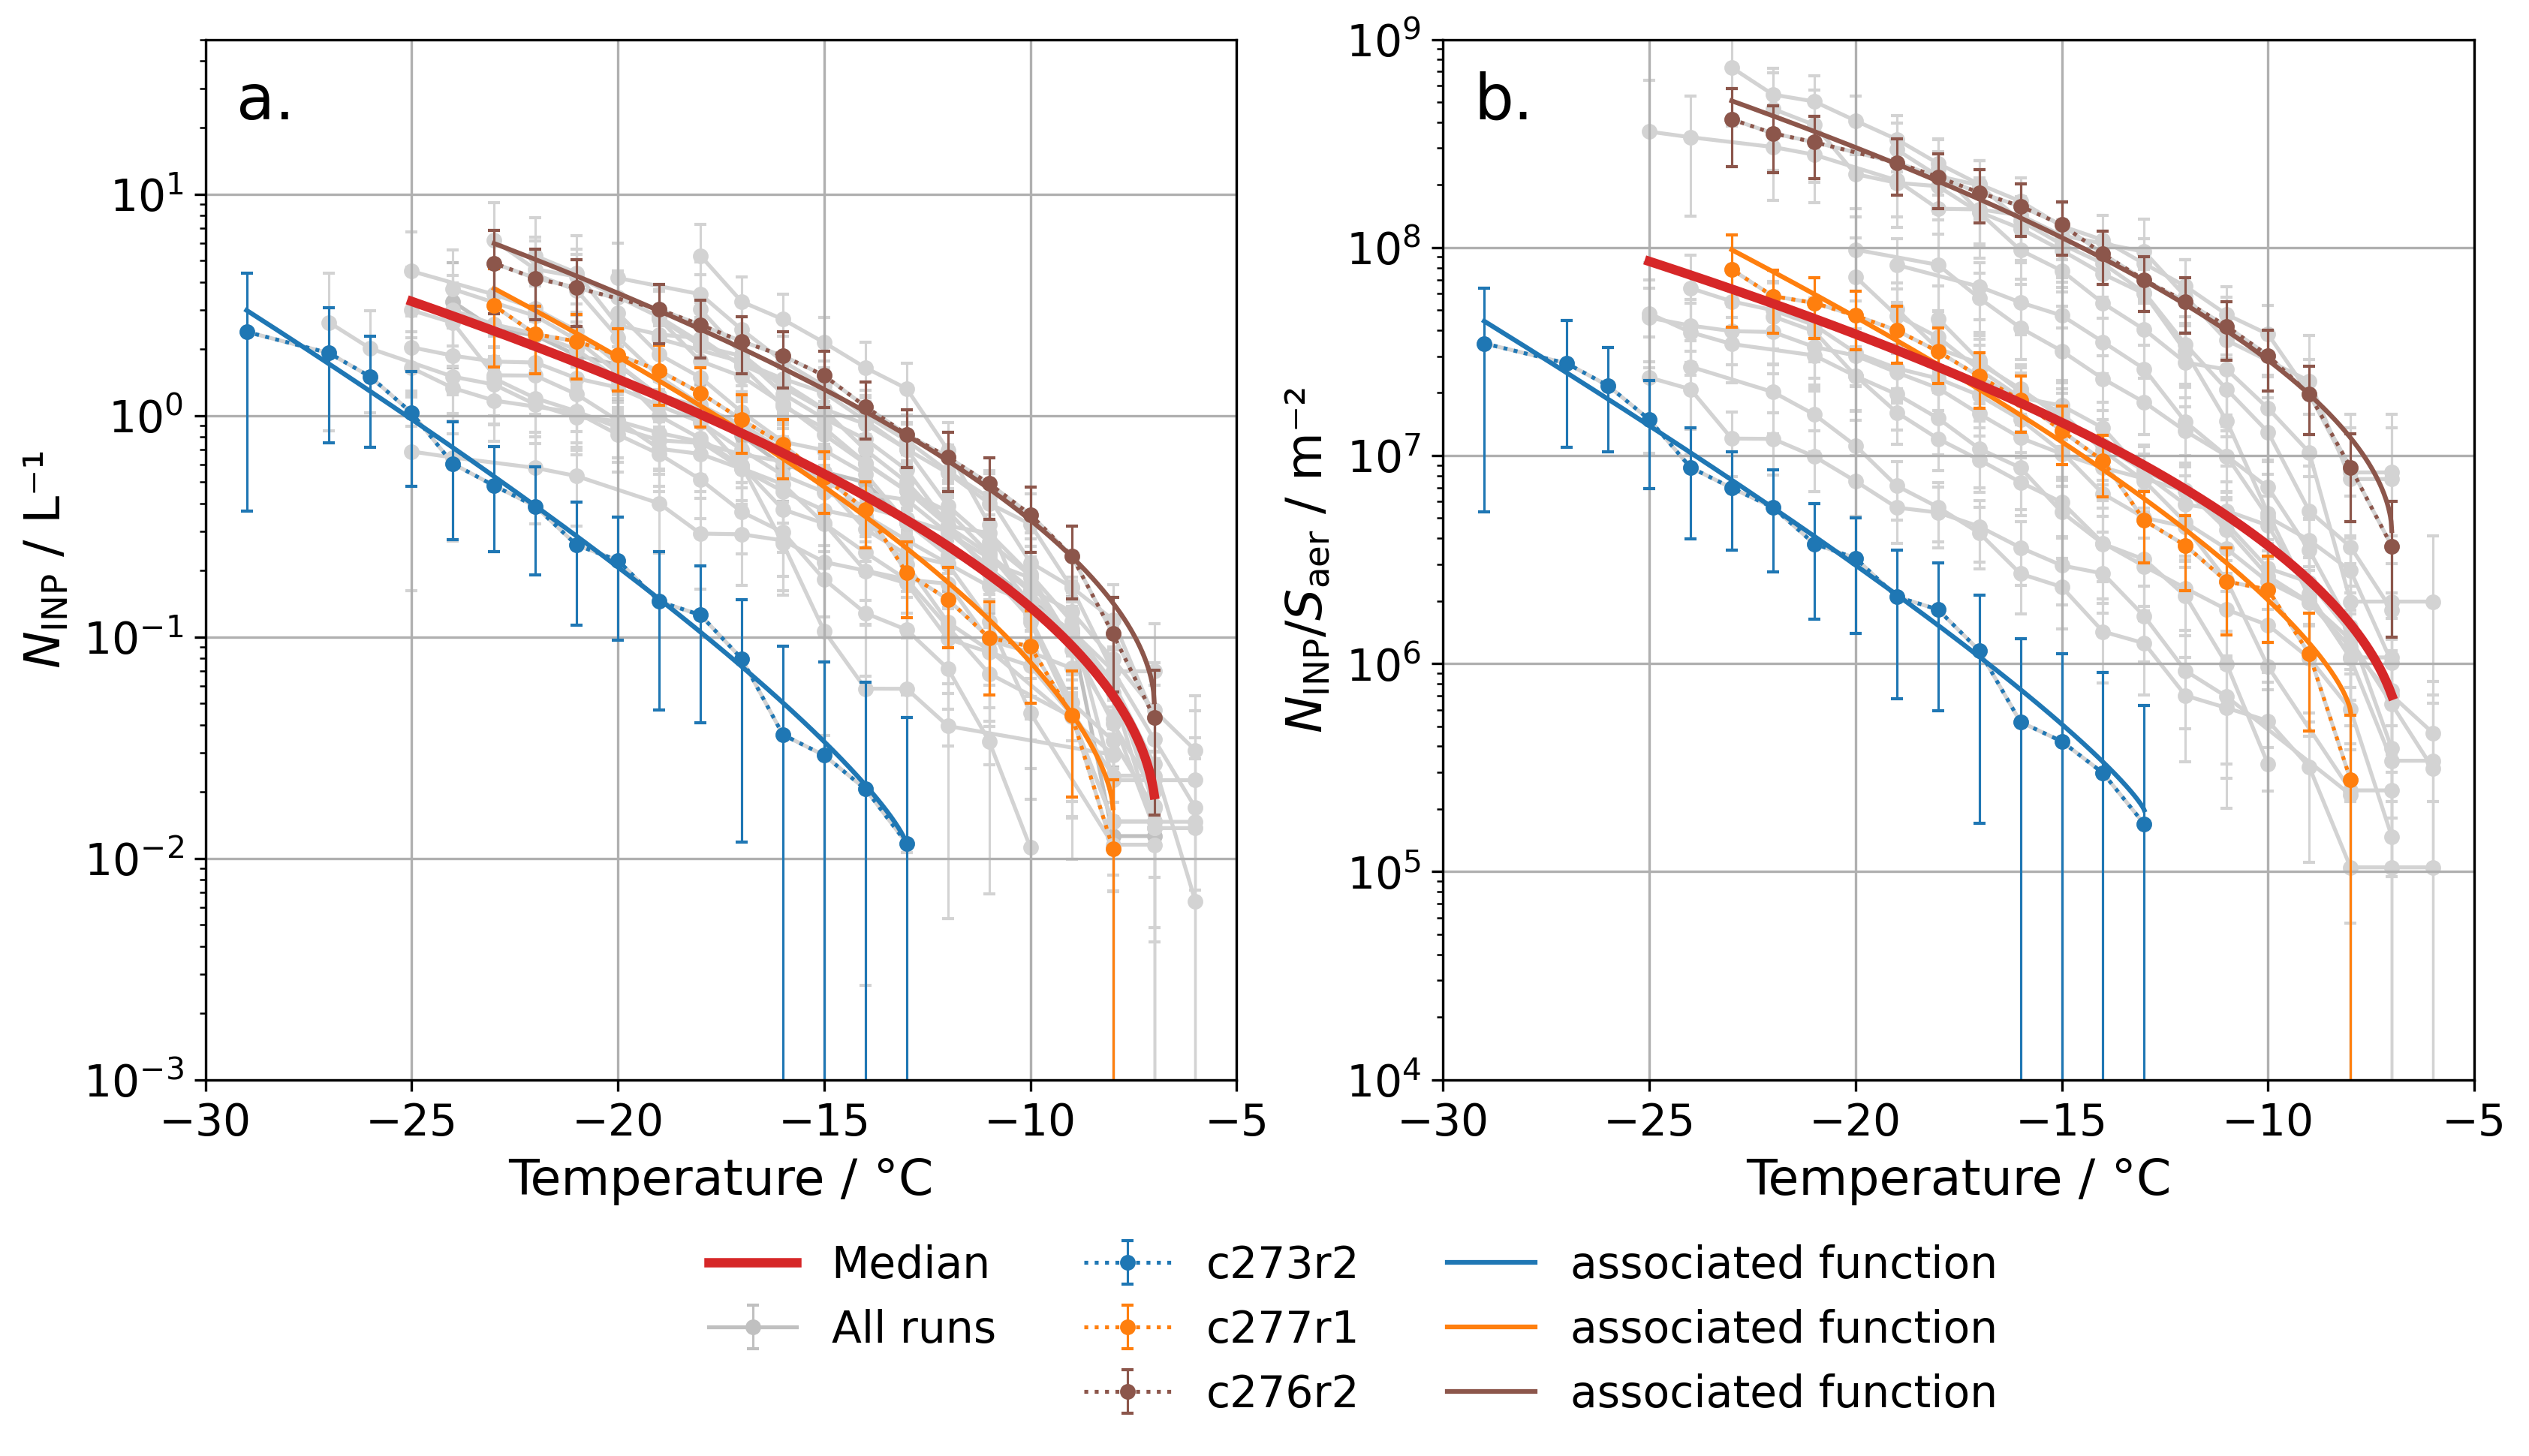

In [6]:
fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(13,6),dpi=300)
for ax in (ax1, ax2):
    ax.set_xlim(-30,-5)
    ax.set_yscale('log')
    ax.grid(zorder=1)
    ax.set_xlabel('Temperature / °C', size=16)
    ax.tick_params(axis='x', labelsize=14) 
    ax.tick_params(axis='y', labelsize=14)
ax1.set_ylim(0.001,50)
ax2.set_ylim(1e4, 1e9)
ax1.set_ylabel(r'$N_\mathrm{INP}$ / L⁻¹', size=16)
ax2.set_ylabel(r'$N_\mathrm{INP}/S_\mathrm{aer}$ / m⁻²', size=16)
# Plot all concentrations, with the first contributing to the legend.
first = True
T = np.linspace(-7,-25,1000)
for col in [col for col in INP_concentrations.columns if col.endswith('NT')]:
    y = INP_concentrations[col]
    y_err = INP_concentrations[col[:-2] + 'err']
    if first == True:
        first = False
        ax1.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
                    linestyle='-', markersize=4, capsize=2, elinewidth=0.75,
                    linewidth=1.25, color='silver', zorder=1,
                    label = 'All runs'
                   )
    else:
        ax1.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
            linestyle='-', markersize=4, capsize=2, elinewidth=0.75,
            linewidth=1.25, color='lightgray',zorder=1,
           )

for col in [col for col in nS_data.columns if col.endswith('nS')]:
    y = nS_data[col]
    y_err = nS_data[col + '_err']
    if first == True:
        first = False
        ax2.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
                    linestyle='-', markersize=4, capsize=2, elinewidth=0.75,
                    linewidth=1.25, color='silver', zorder=1,
                    label = 'nS_values'
                   )
    else:
        ax2.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
            linestyle='-', markersize=4, capsize=2, elinewidth=0.75,
            linewidth=1.25, color='lightgray',zorder=1
           )
# Plot median concentration fit
pred = np.exp(four_param_fit(T, -4.212565, -6.955521, 1.271137, 0.5))
ax1.plot(T,pred,zorder=3,linewidth=3, color='tab:red', label='Median')
pred = np.exp(four_param_fit(T, 12.824831, -6.748666, 1.273831, 0.5))
ax2.plot(T,pred,zorder=3,linewidth=3, color='tab:red', label='Median')

# Plot the fittings and concentrations for the three chosen runs.
particular_runs = ['c273r2t','c277r1t','c276r2t']
colours = ['tab:blue','tab:orange','tab:brown']
for run, colour in zip(particular_runs, colours):
    y = INP_concentrations[run+'_NT']
    y_err = INP_concentrations[run+ '_err']
    ax1.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
                    linestyle='dotted', markersize=4,
                    capsize=2, elinewidth=0.75, linewidth=1.25,
                    label = run[:-1],color=colour
                   )
    run_nu = param.loc[run]['nu_n_INP']
    run_T_max = param.loc[run]['T_max_n_INP']
    run_a = param.loc[run]['a_n_INP']
    run_b = param.loc[run]['b_n_INP']
    T = np.linspace(y.dropna().index.max(), y.dropna().index.min(),1000)
    run_pred = np.exp(four_param_fit(T,run_nu,run_T_max,run_a,run_b))    
    ax1.plot(T, run_pred, label='associated function',color=colour)

    y = nS_data[run+'_nS']
    y_err = nS_data[run+ '_nS_err']
    ax2.errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker='o',
                    linestyle='dotted', markersize=4,
                    capsize=2, elinewidth=0.75, linewidth=1.25,
                    label = run[:-1],color=colour
                   )
    run_nu = param.loc[run]['nu_nS']
    run_T_max = param.loc[run]['T_max_nS']
    run_a = param.loc[run]['a_nS']
    run_b = param.loc[run]['b_nS']
    T = np.linspace(y.dropna().index.max(), y.dropna().index.min(),1000)
    run_pred = np.exp(four_param_fit(T,run_nu,run_T_max,run_a,run_b))    
    ax2.plot(T, run_pred, label='associated function',color=colour)

# Create legend and decorations
ax1.plot([1,2],[1,2],color='white', linestyle='',label=' ')
handles, labels = ax1.get_legend_handles_labels()
order = [0,5,4,6,7,8,1,2,3]

ax1.text(0.03, 0.97, 'a.', ha='left', va='top', fontsize=20,
           transform=ax1.transAxes)
ax2.text(0.03, 0.97, 'b.', ha='left', va='top', fontsize=20,
           transform=ax2.transAxes)
left_legend = ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=14,
                        loc="upper left",frameon=False,bbox_to_anchor=(0.45,-0.12),ncol=3)

fig.savefig('./imgs/fB1.pdf', bbox_inches='tight')


In [7]:
np.exp(four_param_fit(-15, 12.824831, -6.748666, 1.273831, 0.5))

14417132.104536558